

https://github.com/lachmann12/tutorials/blob/master/combat/Homogenization%2Bof%2Bgene%2Bexpression.ipynb


https://www.youtube.com/watch?v=3wjbxDex7_8

https://www.geeksforgeeks.org/how-to-add-r-to-jupyter-notebook/

## Cleaning up gene expression and outlier removal

Some series are clear outliers in the gene expression. Those are best removed if possible. Normal batch effect correction is not advisable. Here is an example of identifying outliers in R and then applying batch effect removal on the Series level for the remaining samples.

## Plotting sample similarity

We can calculate the correlation of samples to each other and identify series that seem to be outliers from the rest.


In [1]:
library("rhdf5")
library("tools")
library("dendextend")
library("preprocessCore")
library("sva")
library("vioplot")

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

---------------------
Welcome to dendextend version 1.15.2
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
You may ask questions at stackoverflow, use the r and dendextend tags: 
	 https://stackoverflow.com/questions/tagged/dendextend

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------


Attaching package: 'dendextend'

The following object is masked from 'package:stats':

    cutree

Loading required package: mgcv
Loading required package: nlme
This is mgcv 1.8-28. For overview type 'help("mgcv-package")'.
Loading required package: genefilter
Loading require

In [2]:
res = load("spleen_expression.rda")

In [3]:
res

[1] "expression" "series"

In [4]:
expression

,GSM1088727,GSM1339956,GSM1339958,GSM2026116,GSM1339955,GSM994535,GSM2067978,GSM1936675,GSM1366910,GSM1339960,...,GSM2464129,GSM2464130,GSM2496324,GSM2496318,GSM2496317,GSM2496322,GSM2496319,GSM2496321,GSM2496320,GSM2496323
0610007P14RIK,477,958,900,413,390,883,176,1228,443,703,...,296,266,163,125,156,103,201,248,112,349
0610009B22RIK,137,139,189,29,64,63,36,224,97,125,...,40,35,13,2,8,0,7,13,0,28
0610009L18RIK,20,24,16,1,14,24,2,85,5,6,...,25,21,0,0,2,3,9,19,19,23
0610009O20RIK,444,1173,1021,212,471,589,354,3729,385,791,...,549,448,278,226,252,185,405,361,162,489
0610010F05RIK,188,544,463,238,178,174,101,562,611,326,...,121,94,131,121,139,109,124,171,105,224
0610010K14RIK,449,984,1061,179,405,704,135,3104,466,731,...,627,584,194,392,263,185,267,359,186,527
0610011F06RIK,234,583,629,116,299,448,110,1644,323,461,...,251,204,63,88,134,47,145,158,57,207
0610012G03RIK,332,424,307,92,158,505,70,1604,764,316,...,272,203,52,71,104,93,134,158,43,207
0610030E20RIK,405,1707,1264,250,630,3023,563,5273,269,1370,...,999,1172,959,948,836,620,812,1250,973,1315
0610037L13RIK,268,656,484,96,258,666,445,3136,205,497,...,442,486,277,345,456,276,426,520,69,601


In [5]:
dim(expression)

[1] 32544   407

The gene counts between samples can vary. Some form of normalization should be performed. Here we apply quantile normalization that will force the expression distribution to be the same for all samples.

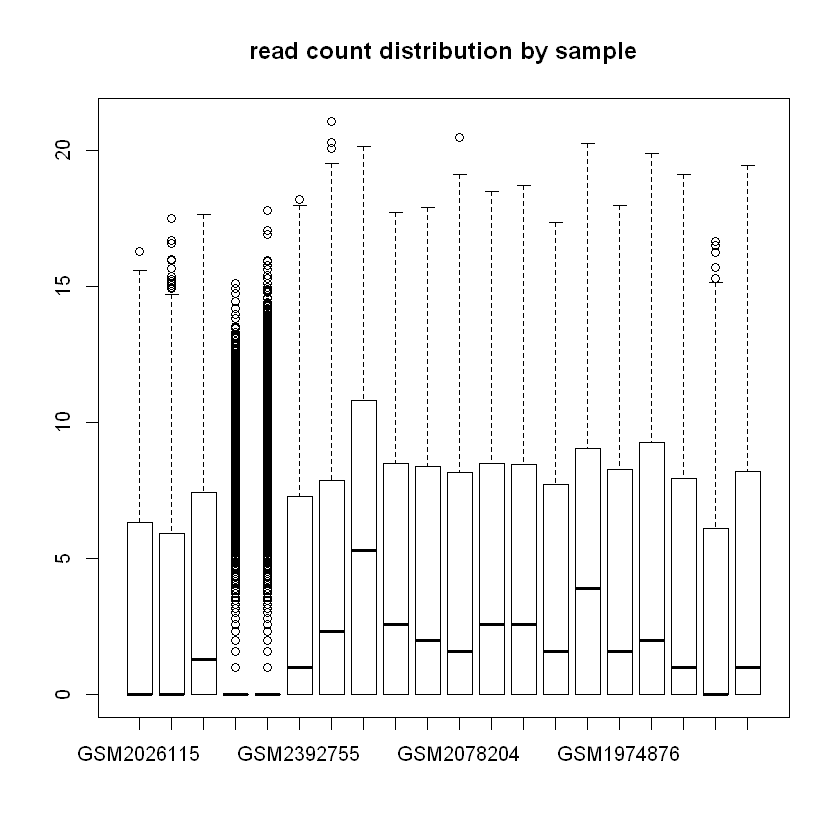

In [6]:
boxplot(log2(1+expression[,sample(1:ncol(expression), 20)]), main="read count distribution by sample")

In [7]:
exp = normalize.quantiles(log2(1+expression))
dimnames(exp) = dimnames(expression)

In [8]:
head(exp)

,GSM1088727,GSM1339956,GSM1339958,GSM2026116,GSM1339955,GSM994535,GSM2067978,GSM1936675,GSM1366910,GSM1339960,...,GSM2464129,GSM2464130,GSM2496324,GSM2496318,GSM2496317,GSM2496322,GSM2496319,GSM2496321,GSM2496320,GSM2496323
0610007P14RIK,9.630941,9.072548,9.263994,10.471395,9.163211,9.211428,8.099405,8.287072,9.373968,8.929456,...,8.084881,7.994318,7.87133900,7.72817821,7.7500630,7.76105473,8.142643,7.998084,8.10052536,8.254960
0610009B22RIK,7.067508,6.370237,7.050854,6.821127,6.573205,5.702244,5.726498,6.260966,7.286857,6.332588,...,4.716340,4.614360,3.70455887,3.72347958,1.9843590,0.02967277,2.825545,3.264060,0.03823647,4.304307
0610009L18RIK,3.920610,3.974293,3.811424,3.414874,4.606536,4.441742,2.374682,5.217084,3.393852,2.363836,...,3.890808,3.734706,0.01942725,0.04069347,0.6983813,2.77556388,3.216166,3.766784,5.15181313,4.029736
0610009O20RIK,9.490933,9.409246,9.463237,9.445163,9.481823,8.699843,9.016682,9.891496,9.192219,9.133019,...,8.952416,8.739627,8.67266344,8.50206635,8.4586823,8.55329294,9.033718,8.501495,8.56121117,8.707358
0610010F05RIK,7.809898,8.244701,8.260333,9.622594,7.990209,7.069576,7.305756,7.283331,9.799012,7.769045,...,6.652313,6.298744,7.55257453,7.68706616,7.5731604,7.84167923,7.410374,7.408835,8.02522313,7.591437
0610010K14RIK,9.509636,9.125415,9.528735,9.178755,9.228533,8.928325,7.726726,9.613257,9.432432,8.994746,...,9.146056,9.103799,8.13845095,9.17059356,8.5199055,8.55329294,8.498897,8.494063,8.73797100,8.809086



Identify outlier samples

Some samples are different. Here we calculate pairwise correlation and plot a dendrogram to see which samples we might consider to remove. Here we cut the dendrogram tree at 0.25 and keep the largest cluster.


In [9]:
cc = cor(exp)

dend <- as.dendrogram(hclust(as.dist(1-cc)))

useries = unique(series)
series_match = useries[match(series, useries)]

colos <- colorspace::rainbow_hcl(length(useries), c = 160, l  = 50)
names(colos) = useries
series_color <- colos[series_match]

clu = cutree(dend, h=0.25)
labels_colors(dend) <- series_color[order.dendrogram(dend)]
dend <- color_branches(dend, h = 0.25)


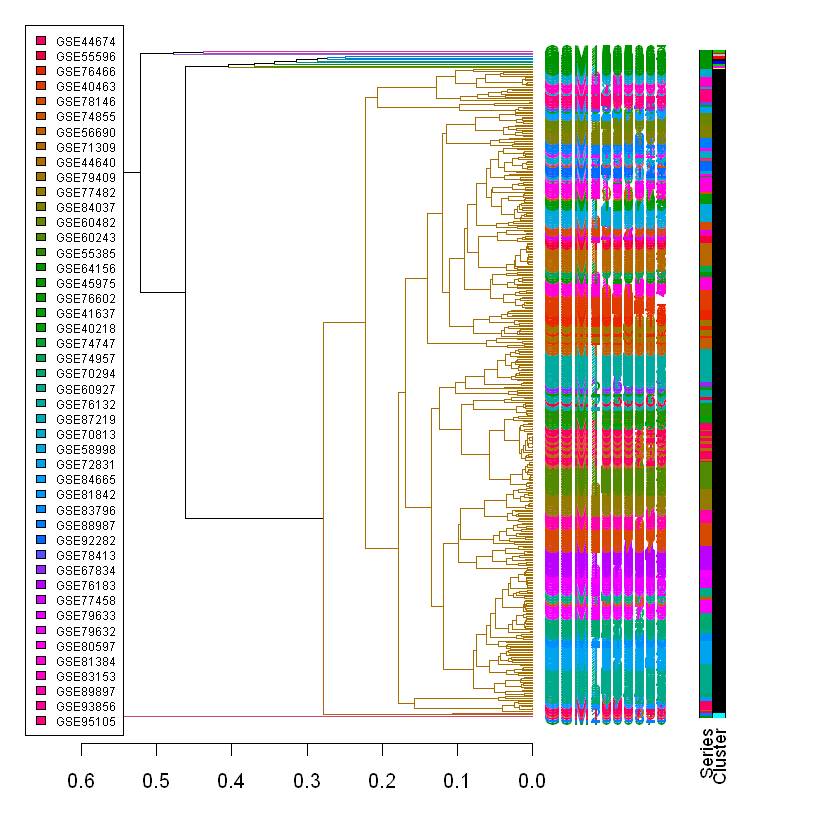

In [10]:
par(mar = c(4,1,1,12))
plot(dend, horiz = TRUE)
colored_bars(cbind(clu, series_color), dend, rowLabels = c("Cluster", "Series"), horiz = TRUE)
legend("topleft", legend = useries, fill = colos, bg="white", cex=0.6)

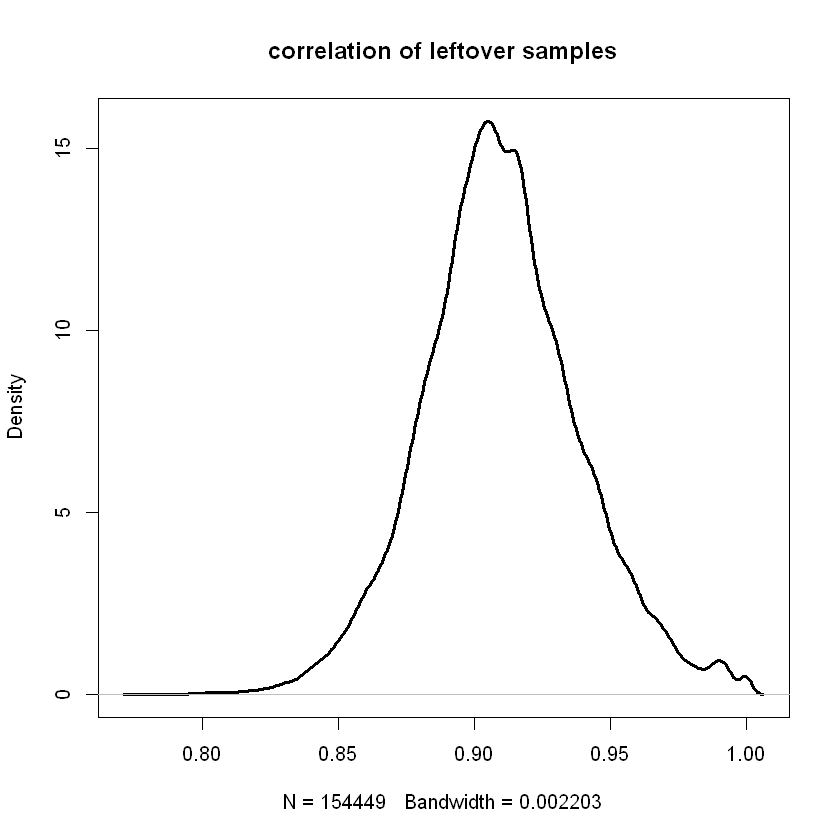

In [11]:
largest_cluster = names(rev(sort(table(clu))))[1]
ww = which(clu == largest_cluster)
plot(density(cor(exp[,ww])), lwd=3, main="correlation of leftover samples")

In [12]:
reduced_expression = exp[,ww]
reduced_series = series[ww]


Batch effect removal with Combat SVA

By identifying series labels as confounders of gene expression we can now homogenize the gene expression accross series.


In [13]:
batchid = match(reduced_series, unique(reduced_series))
correctedExpression <- ComBat(dat=reduced_expression, batch=batchid, par.prior=TRUE, prior.plots=FALSE)



Found45batches
Note: one batch has only one sample, setting mean.only=TRUE
Adjusting for0covariate(s) or covariate level(s)


Standardizing Data across genes


Fitting L/S model and finding priors
Finding parametric adjustments
Adjusting the Data



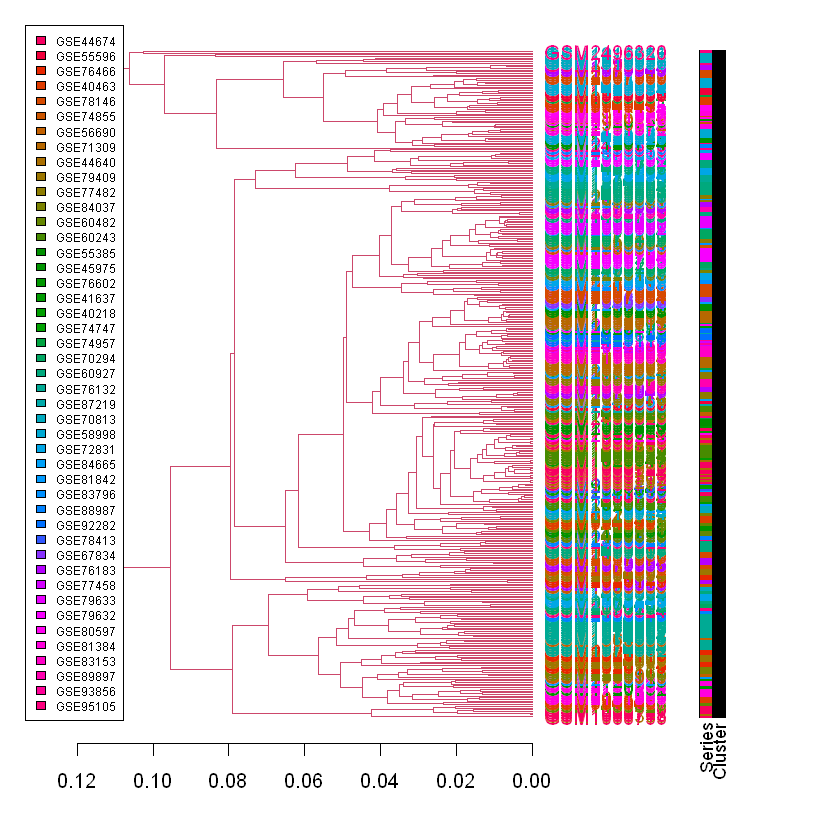

In [14]:
cc = cor(correctedExpression)
dend <- as.dendrogram(hclust(as.dist(1-cc)))
useries = unique(reduced_series)
series_match = useries[match(reduced_series, useries)]
colos <- colorspace::rainbow_hcl(length(useries), c = 160, l  = 50)
names(colos) = useries
series_color <- colos[series_match]
clu = cutree(dend, h=0.25)
labels_colors(dend) <- series_color[order.dendrogram(dend)]
dend <- color_branches(dend, h = 0.25)

par(mar = c(4,1,1,12))
plot(dend, horiz = TRUE)
colored_bars(cbind(clu, series_color), dend, rowLabels = c("Cluster", "Series"), horiz = TRUE)
legend("topleft", legend = useries, fill = colos, bg="white", cex=0.6)

After the batch effect removal (series are batches) the variability accross samples is significanlty reduced. The pairwise correlation of the gene expression is higher as shown in the plot below.

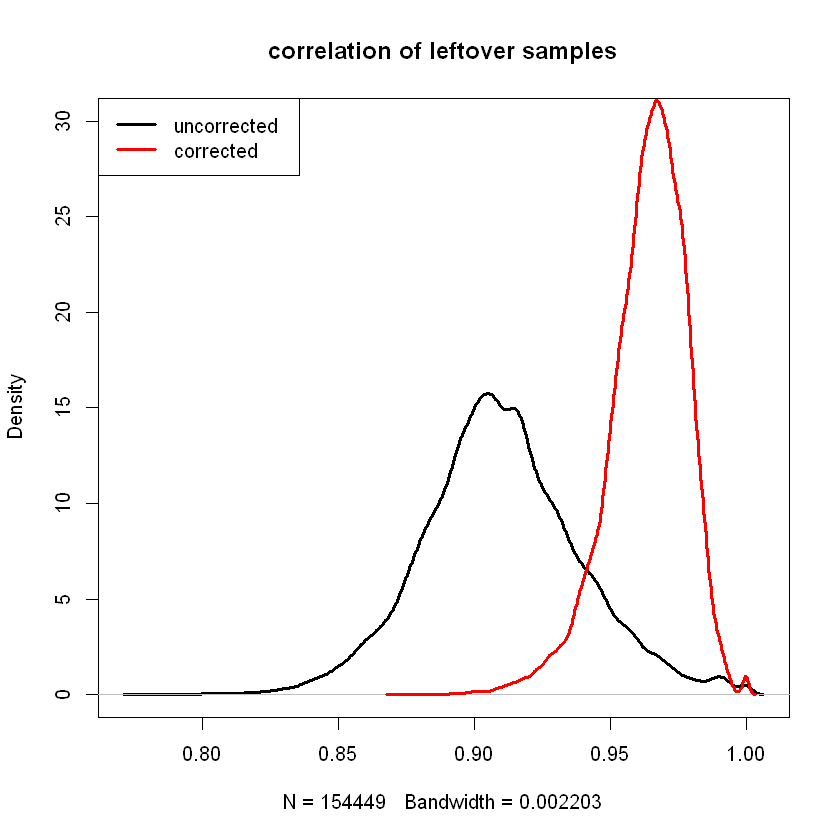

In [15]:
plot(density(cor(exp[,ww])), lwd=3, main="correlation of leftover samples", ylim=c(0,30))
lines(density(cor(correctedExpression)), lwd=3, main="correlation of leftover samples", col="red")
legend("topleft", legend=c("uncorrected","corrected"), lty=1, lwd=3, col=c("black","red"))

This resulting gene expression should be more reliable. Combat also supports more complicated confounder removal. For this look at specific instructions in the SVA manual.